In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pygraphon.graphons.StepGraphon import StepGraphon
import numpy as np
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt
from pygraphon.utils.utils_graph import edge_density

In [3]:
graphon_matrix = np.array([[0.8,0.4,0.4],[0.4,0.8,0.4],[0.4,0.4,0.8]])
graphon = StepGraphon(graphon_matrix,1/3)

In [4]:
print(graphon.integral(graphon_matrix), graphon.integral())

0.5333333333333333 0.9999999999999999


In [5]:
graphon.graphon

array([[1.5 , 0.75, 0.75],
       [0.75, 1.5 , 0.75],
       [0.75, 0.75, 1.5 ]])

In [6]:
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt

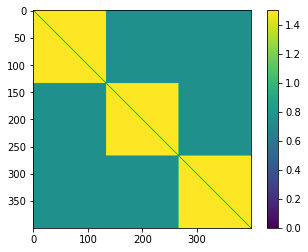

In [7]:
plt.imshow(graphon._get_edge_probabilities(400,False,True))
plt.colorbar()
plt.show()

In [8]:
A = graphon.draw(rho = 0.7,n = 300, exchangeable=False)

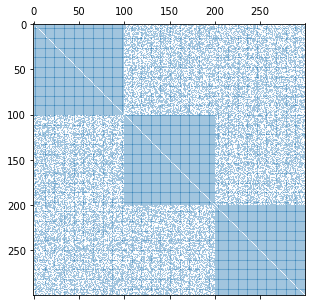

In [9]:
fig, ax = spy(A)
plt.show()

In [10]:
edge_density(A)

0.6782608695652174

In [11]:
print(edge_density(A[0:100,0:100]))
print(edge_density(A[0:100,100:200]))

1.0
0.5313131313131313


In [12]:
from pygraphon.estimators.HistogramEstimator import HistogramEstimator
from pygraphon.estimators.MomentEstimator import MomentEstimator, SimpleMomentEstimator

import matlab.engine
eng = matlab.engine.start_matlab()

In [13]:
hist = HistogramEstimator(eng, bandwithHist= 1/3)
hist_epprox = hist.estimate(adjacency_matrix= A)

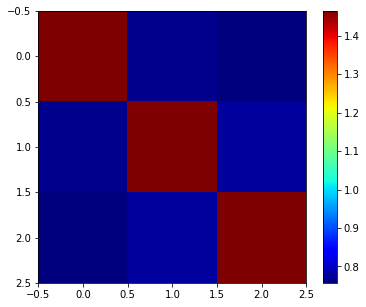

In [14]:
from pygraphon.plots.plots_graphon import plot
plot(hist_epprox)
plt.show()

In [15]:
momsimple = SimpleMomentEstimator(3,eng)
mome_simple_approx = momsimple.estimate(adjacency_matrix= A)

/Users/dufour/Documents/code/Evolution_of_networks/pygraphon/env/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


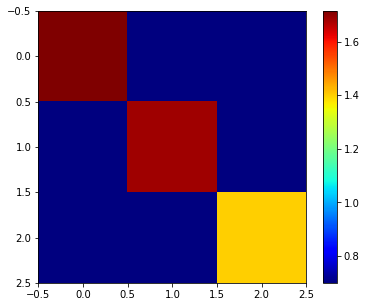

In [16]:
plot(mome_simple_approx)
plt.show()

In [17]:
mome_simple_approx.graphon

array([[1.71437621, 0.70034399, 0.70034399],
       [0.70034399, 1.68347843, 0.70034399],
       [0.70034399, 0.70034399, 1.40008141]])

In [18]:
mome_simple_approx.integral()

1.0000000000000002

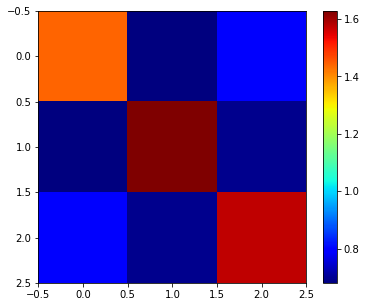

In [19]:
mom = MomentEstimator(3,eng)
mom_approx = mom.estimate(adjacency_matrix= A)
plot(mom_approx)
plt.show()

In [20]:
mom_approx.graphon

array([[1.44116679, 0.6810337 , 0.8019572 ],
       [0.6810337 , 1.62785706, 0.694572  ],
       [0.8019572 , 0.694572  , 1.57585037]])

In [21]:
mom_approx.integral()

1.0000000000000002